<a href="https://colab.research.google.com/github/krishnakantkmr/github/blob/master/mini_project_(original).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import os

In [ ]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
data = pd.read_csv('abc.us.txt')

data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1995-04-04,2.6690,2.6917,2.5556,2.6782,22205246,0
1,1995-04-05,2.6372,2.6917,2.5782,2.5782,6727902,0
2,1995-04-06,2.5782,2.6690,2.5782,2.6236,2076079,0
3,1995-04-07,2.6372,2.6372,2.5782,2.5782,1056077,0
4,1995-04-10,2.5782,2.6372,2.5782,2.6103,1125568,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691 entries, 0 to 5690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     5691 non-null   object 
 1   Open     5691 non-null   float64
 2   High     5691 non-null   float64
 3   Low      5691 non-null   float64
 4   Close    5691 non-null   float64
 5   Volume   5691 non-null   int64  
 6   OpenInt  5691 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 311.4+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,5691.000000,5691.000000,5691.000000,5691.000000,5.691000e+03,5691.0
mean,29.155922,29.440014,28.869977,29.162565,2.974895e+06,0.0
std,28.277241,28.499514,28.049723,28.277796,3.000631e+06,0.0
min,2.268900,2.328100,2.241400,2.268900,0.000000e+00,0.0
25%,10.344500,10.556000,10.093000,10.338000,1.292712e+06,0.0
50%,17.487000,17.670000,17.305000,17.492000,2.369097e+06,0.0
75%,36.032000,36.326500,35.708000,35.988500,3.840224e+06,0.0
max,112.970000,116.130000,110.660000,111.140000,6.077589e+07,0.0


In [ ]:
data.isnull().sum()


Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [ ]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Volume,OpenInt,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,1995-04-04,2.6690,2.6917,2.5556,2.6782,22205246,0,29.147287,29.062028,28.94208,0.000806
1,1995-04-05,2.6372,2.6917,2.5782,2.5782,6727902,0,29.147287,29.062028,28.94208,-0.037339
2,1995-04-06,2.5782,2.6690,2.5782,2.6236,2076079,0,29.147287,29.062028,28.94208,0.017609
3,1995-04-07,2.6372,2.6372,2.5782,2.5782,1056077,0,29.147287,29.062028,28.94208,-0.017304
4,1995-04-10,2.5782,2.6372,2.5782,2.6103,1125568,0,29.147287,29.062028,28.94208,0.012451


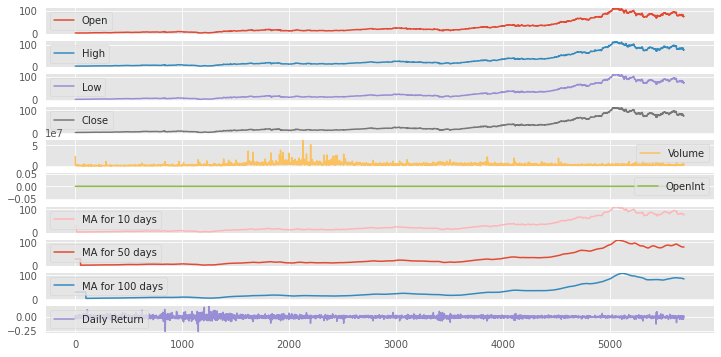

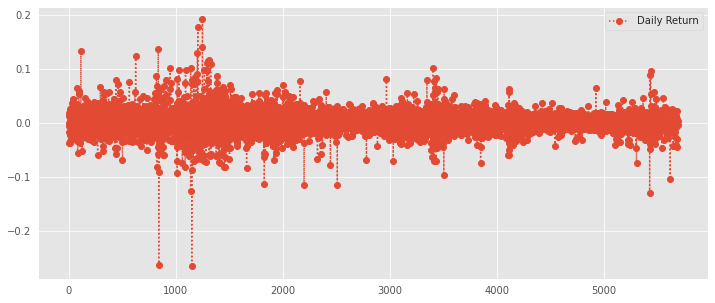

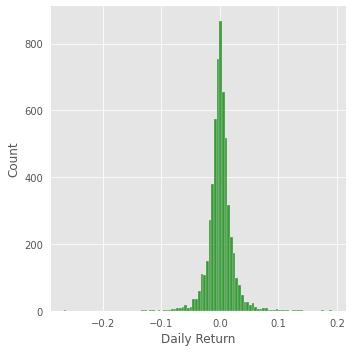

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


            Date     Open     High      Low    Close    Volume  OpenInt  \
0     1995-04-04   2.6690   2.6917   2.5556   2.6782  22205246        0   
1     1995-04-05   2.6372   2.6917   2.5782   2.5782   6727902        0   
2     1995-04-06   2.5782   2.6690   2.5782   2.6236   2076079        0   
3     1995-04-07   2.6372   2.6372   2.5782   2.5782   1056077        0   
4     1995-04-10   2.5782   2.6372   2.5782   2.6103   1125568        0   
...          ...      ...      ...      ...      ...       ...      ...   
5686  2017-11-06  74.8600  75.1668  74.8600  74.8600   3478259        0   
5687  2017-11-07  74.9200  75.7300  74.5600  74.9100   1777500        0   
5688  2017-11-08  74.8700  75.4100  73.2700  75.0100   1710169        0   
5689  2017-11-09  75.0700  76.6300  74.9000  75.2700   2576849        0   
5690  2017-11-10  75.0500  76.6800  74.0500  75.0000   3005741        0   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0          29.147287       29

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
OpenInt            0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

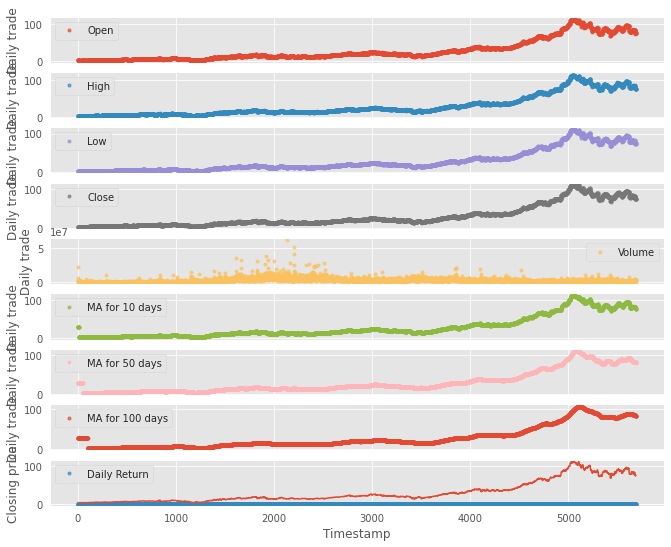

In [ ]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage

data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

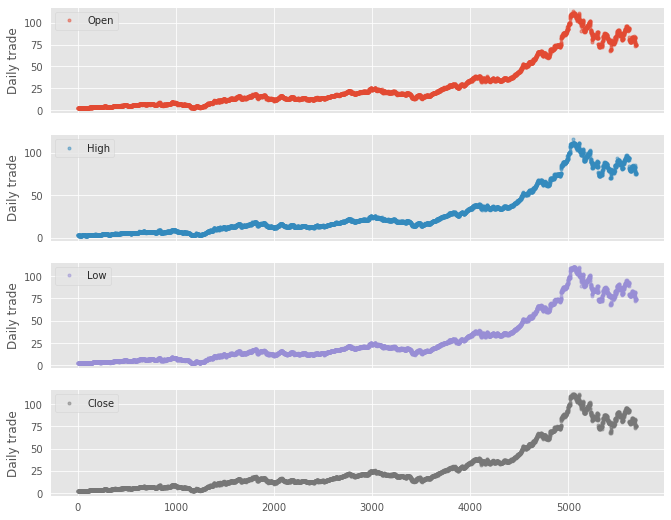

In [ ]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date     Open     High      Low    Close    Volume  OpenInt  \
0     1995-04-04   2.6690   2.6917   2.5556   2.6782  22205246        0   
1     1995-04-05   2.6372   2.6917   2.5782   2.5782   6727902        0   
2     1995-04-06   2.5782   2.6690   2.5782   2.6236   2076079        0   
3     1995-04-07   2.6372   2.6372   2.5782   2.5782   1056077        0   
4     1995-04-10   2.5782   2.6372   2.5782   2.6103   1125568        0   
...          ...      ...      ...      ...      ...       ...      ...   
5686  2017-11-06  74.8600  75.1668  74.8600  74.8600   3478259        0   
5687  2017-11-07  74.9200  75.7300  74.5600  74.9100   1777500        0   
5688  2017-11-08  74.8700  75.4100  73.2700  75.0100   1710169        0   
5689  2017-11-09  75.0700  76.6300  74.9000  75.2700   2576849        0   
5690  2017-11-10  75.0500  76.6800  74.0500  75.0000   3005741        0   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0          29.147287       29

,count,mean,std,min,25%,50%,75%,max
Open,5691.0,2.915592e+01,2.827724e+01,2.268900,1.034450e+01,1.748700e+01,3.603200e+01,1.129700e+02
High,5691.0,2.944001e+01,2.849951e+01,2.328100,1.055600e+01,1.767000e+01,3.632650e+01,1.161300e+02
Low,5691.0,2.886998e+01,2.804972e+01,2.241400,1.009300e+01,1.730500e+01,3.570800e+01,1.106600e+02
Close,5691.0,2.916257e+01,2.827780e+01,2.268900,1.033800e+01,1.749200e+01,3.598850e+01,1.111400e+02
Volume,5691.0,2.974895e+06,3.000631e+06,0.000000,1.292712e+06,2.369097e+06,3.840224e+06,6.077589e+07
OpenInt,5691.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MA for 10 days,5691.0,2.914729e+01,2.822878e+01,2.340320,1.053090e+01,1.751890e+01,3.589960e+01,1.103970e+02
MA for 50 days,5691.0,2.906203e+01,2.798145e+01,2.505010,1.075317e+01,1.748820e+01,3.544565e+01,1.095582e+02
MA for 100 days,5691.0,2.894208e+01,2.764891e+01,2.545438,1.120569e+01,1.770567e+01,3.509773e+01,1.077115e+02
Daily Return,5691.0,8.062584e-04,2.092506e-02,-0.266594,-8.362146e-03,2.426203e-04,9.773462e-03,1.916736e-01


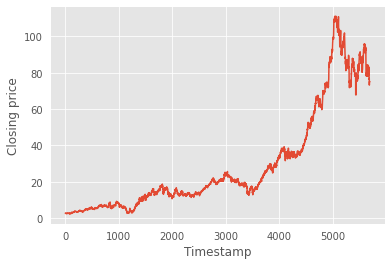

In [ ]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

training


In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((int(df.iloc[i + j, 2]) - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4471
1118


In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
112/112 [==============================] - 26s 119ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0927 - val_loss: 0.0117 - val_mse: 0.0117 - val_mae: 0.0751
Epoch 2/40
112/112 [==============================] - 7s 67ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0681 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0575
Epoch 3/40
112/112 [==============================] - 6s 51ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0619 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0578
Epoch 4/40
112/112 [==============================] - 4s 36ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0598 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0575
Epoch 5/40
112/112 [==============================] - 4s 36ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0598 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0509
Epoch 6/40
112/112 [==============================] - 4s 36ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0560 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0470
Epoch 7/

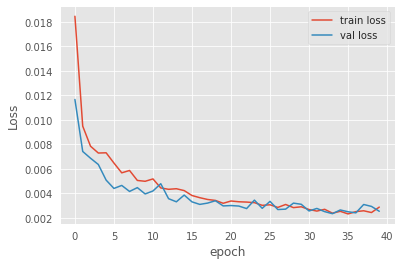

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

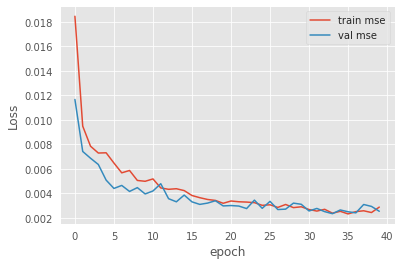

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

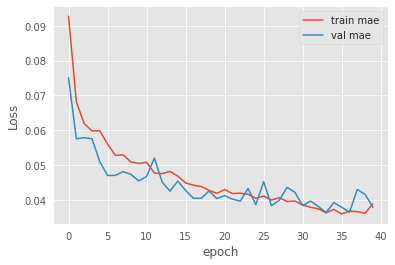

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 1, 21, 64)       

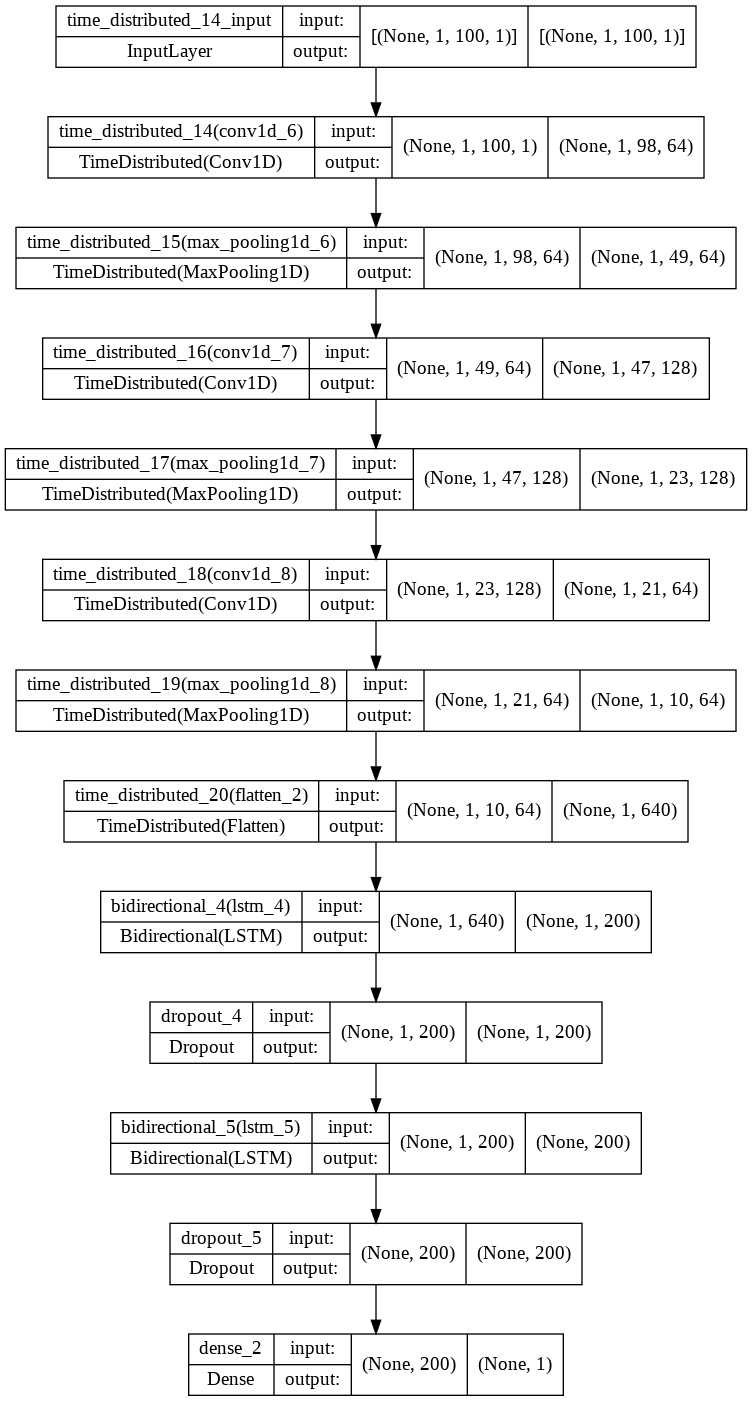

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

35/35 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0378


[0.0025488585233688354, 0.0025488585233688354, 0.037811409682035446]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.946237
R2 Score: 0.946237
Max Error: 0.249830


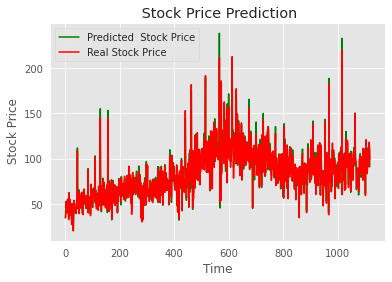

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
   
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

testing part

In [ ]:
model.save("model.h5")

In [ ]:
new_model = tf.keras.models.load_model("./model.h5")

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 1, 21, 64)       

In [ ]:
# For data preprocessing and analysis part
#data2 = pd.read_csv('aaoi.us.txt')
#data2 = pd.read_csv('COALINDIA.csv')
#data2 = pd.read_csv('../input/stock-market-data/stock_market_data/nasdaq/csv/ACTG.csv')
data2 = pd.read_csv('AB.csv')
# Any CSV or TXT file can be added here....
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


            Low       Open  Volume       High      Close  Adjusted Close
0      2.500000   0.000000  471200   2.562500   2.531250        0.212863
1      2.531250   2.531250  430000   2.593750   2.593750        0.218119
2      2.562500   2.593750  376400   2.625000   2.593750        0.218119
3      2.625000   2.625000  364400   2.656250   2.625000        0.220747
4      2.625000   2.625000  317600   2.656250   2.656250        0.223375
...         ...        ...     ...        ...        ...             ...
8485  47.700001  49.500000  545600  49.900002  48.360001       48.360001
8486  46.720001  48.230000  633700  48.400002  47.860001       47.860001
8487  47.610001  48.450001  347300  49.000000  47.820000       47.820000
8488  46.009998  46.660000  466700  47.660000  47.060001       47.060001
8489  44.520000  46.250000  264142  46.400002  44.779999       44.779999

[8490 rows x 6 columns]
6710
1678


In [ ]:
model.evaluate(test_X, test_Y)

53/53 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0452


[0.004408096428960562, 0.004408096428960562, 0.04515008255839348]

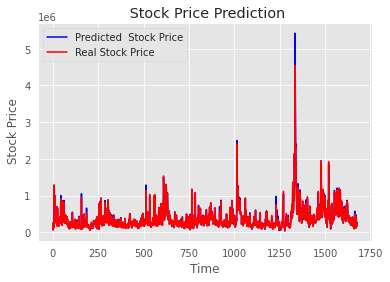

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'blue', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()